# I.1 General Exploration

In [20]:
# Load libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency

In [21]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


In [22]:
import os
os.getcwd()

'c:\\Users\\renya\\Documents\\DataScience\\House Prediction'

In [23]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
# list comprehension
myList = [1, 2, 3, 4]
[val**2 for val in myList]

[1, 4, 9, 16]

In [25]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns] #
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [26]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
df_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [29]:
df_train.Street.value_counts(normalize=True)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

In [30]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)
# df_train.drop(columns=["Id"], inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [31]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# I.2 Numerical Features

## I.2.1 Explore and Clean Numerical features

In [33]:
# Let's select the columns of the train set with numerical data
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [34]:
# Let's drop quasi-constant features where 95% of the values are similar or constant
# sel : selector
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit: finds the features with constant variance
sel.fit(df_train_num.drop(columns="SalePrice")) # all cols except 'SalePrice'

VarianceThreshold(threshold=0.05)

In [35]:
# sel.get_support()

In [36]:
# sum([True, True])

In [37]:
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

Number of retained features: 35

Number of quasi_constant features: 1


In [38]:
df_train_num.iloc[:, :-1].columns[sel.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [39]:
# Get quasi_constant feature(s)
df_train_num.iloc[:, :-1].columns[~sel.get_support()]

Index(['KitchenAbvGr'], dtype='object')

In [40]:
df_train.KitchenAbvGr.value_counts(normalize=True)

1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

In [41]:
# Notes!
# Example Case
myArr = np.array([1, 2, 3, 4])
myFilter = np.array([True, True, True, False])
myArr[myFilter]

array([1, 2, 3])

In [42]:
myArr[~myFilter]

array([4])

In [43]:
quasi_constant_features_list = (
    df_train_num
    .iloc[:, :-1]
    .columns[~sel.get_support()]
    .tolist()
)

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Quasi-constant features to be dropped: ['KitchenAbvGr']


In [44]:
df_train["KitchenAbvGr"].value_counts(dropna=False).sort_index()

0       1
1    1392
2      65
3       2
Name: KitchenAbvGr, dtype: int64

In [45]:
df_train["KitchenAbvGr"].value_counts(normalize=True).sort_index()

0    0.000685
1    0.953425
2    0.044521
3    0.001370
Name: KitchenAbvGr, dtype: float64

In [46]:
# Let's drop these columns from df_train_num
df_train_num.drop(
    quasi_constant_features_list,
    axis=1,
    inplace=True
)

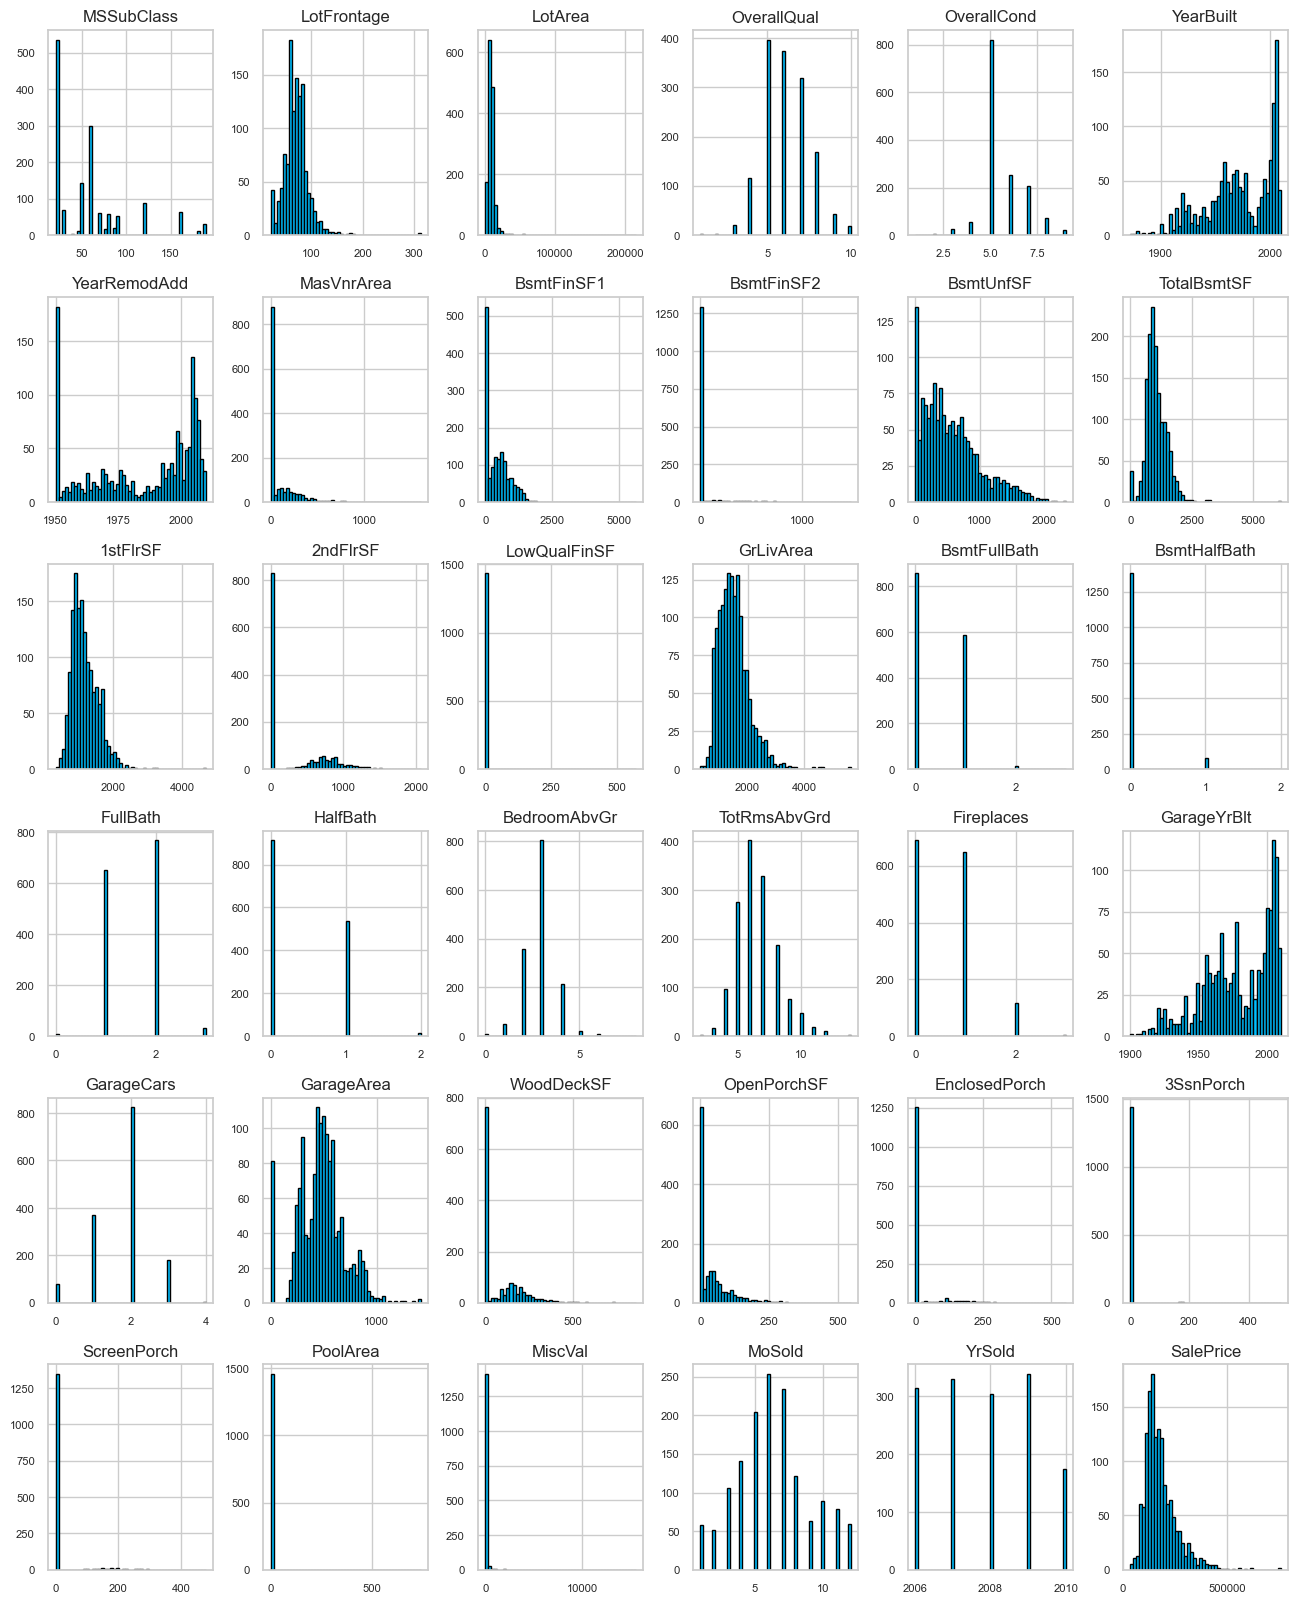

In [47]:
# Plot the distribution of all the numerical data
fig_ = df_train_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

In [48]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [49]:
# Define correlation matrix
corr_matrix = df_train_num.corr()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,...,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,...,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39
BsmtFinSF2,-0.07,0.05,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,...,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01


In [50]:
# Replace correlation < |0.3| by 0 for a better visibility
low_corr_filter = (corr_matrix < 0.3) & (corr_matrix > -0.3)
corr_matrix[low_corr_filter] = 0
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LotFrontage,-0.39,1.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
LotArea,0.00,0.43,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OverallQual,0.00,0.00,0.00,1.00,0.00,0.57,0.55,0.41,0.00,0.00,...,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.79
OverallCond,0.00,0.00,0.00,0.00,1.00,-0.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
YearBuilt,0.00,0.00,0.00,0.57,-0.38,1.00,0.59,0.32,0.00,0.00,...,0.00,0.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.52
YearRemodAdd,0.00,0.00,0.00,0.55,0.00,0.59,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.51
MasVnrArea,0.00,0.00,0.00,0.41,0.00,0.32,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.48
BsmtFinSF1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39
BsmtFinSF2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [51]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

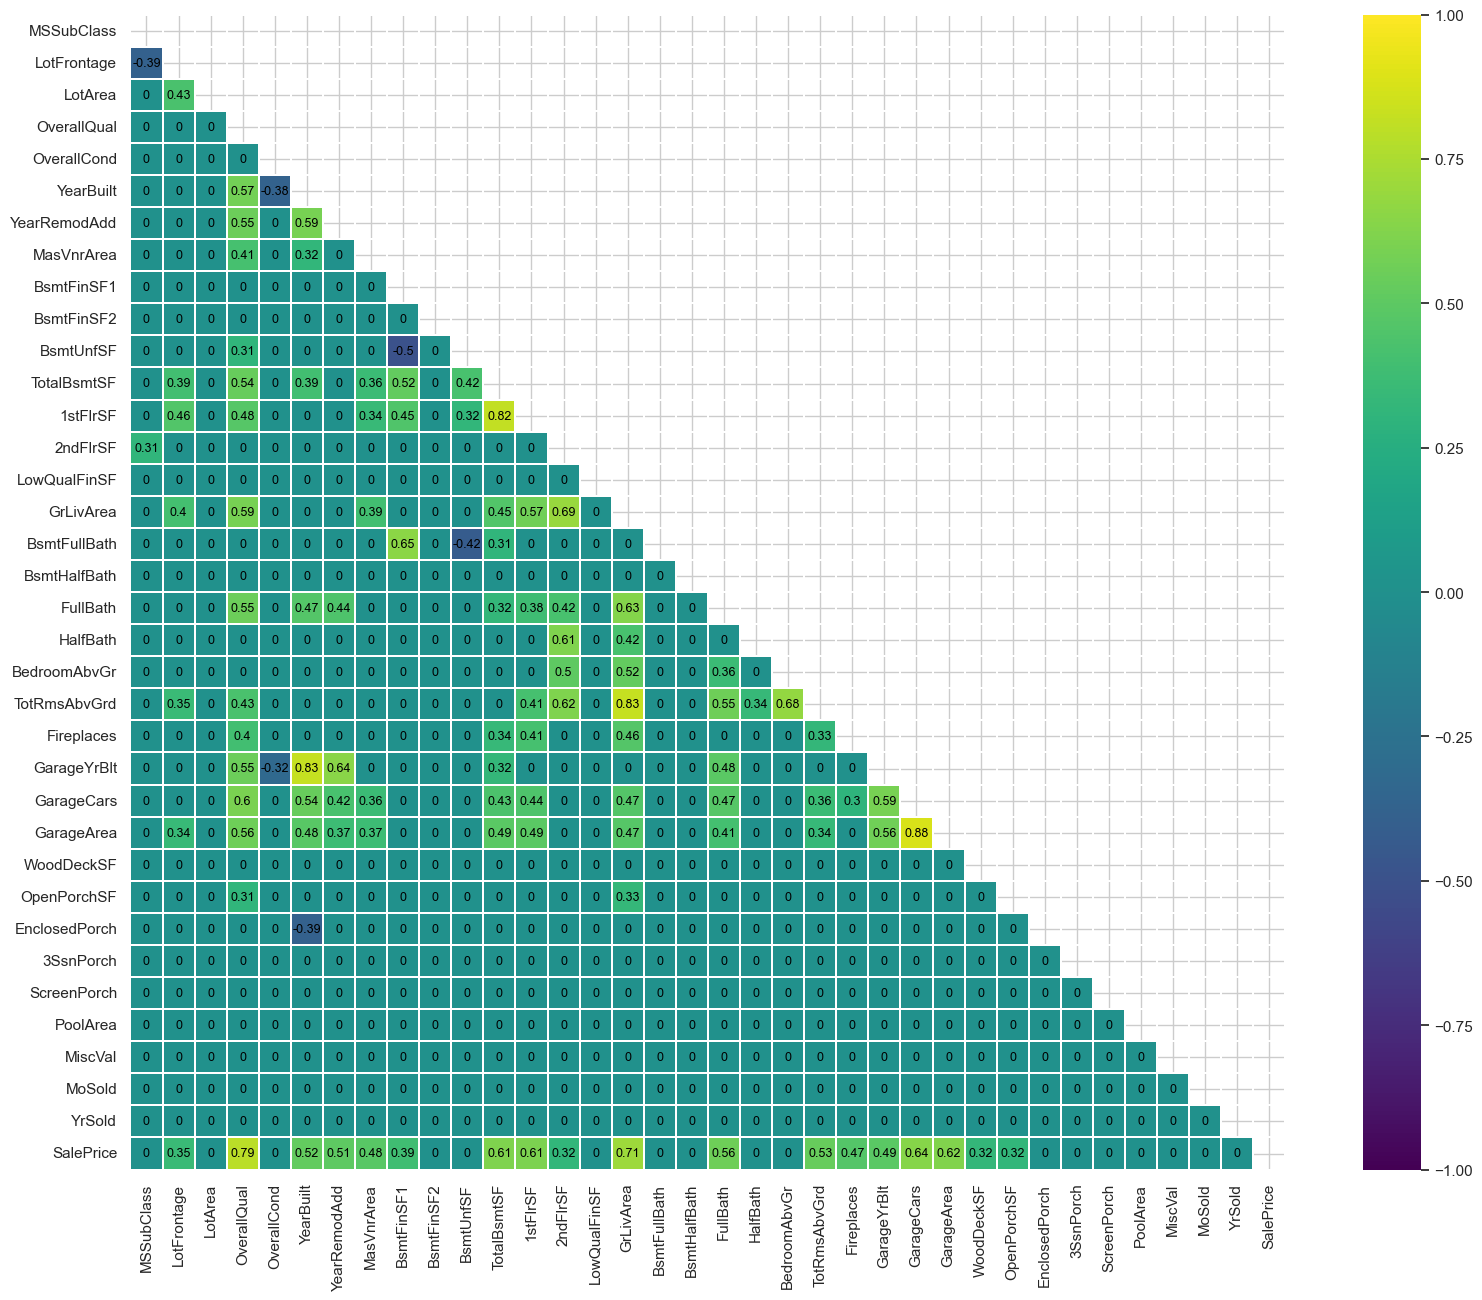

In [52]:
# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(
    data = corr_matrix,
    mask = mask, # cover, not showing them which masked True
    vmax = 1.0,
    vmin = -1.0,
    linewidths = 0.1,
    annot_kws = {
        "size": 9,
        "color": "black"
    },
    square = True,
    cmap = cmap,
    annot = True
);

In [53]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_corr_mask = abs(df_num_corr) >= 0.5
high_features_list = df_num_corr[high_corr_mask].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_corr_mask = (abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)
low_features_list = df_num_corr[low_corr_mask].sort_values(ascending=False)
print(f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")

10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


In [56]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(
            x=strong_features[i],
            y="SalePrice",
            data=df_strong_features,
            ax=ax,
            scatter_kws= {"color": "deepskyblue"},
            line_kws={"color": "black"}
        )

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
df_strong_features

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


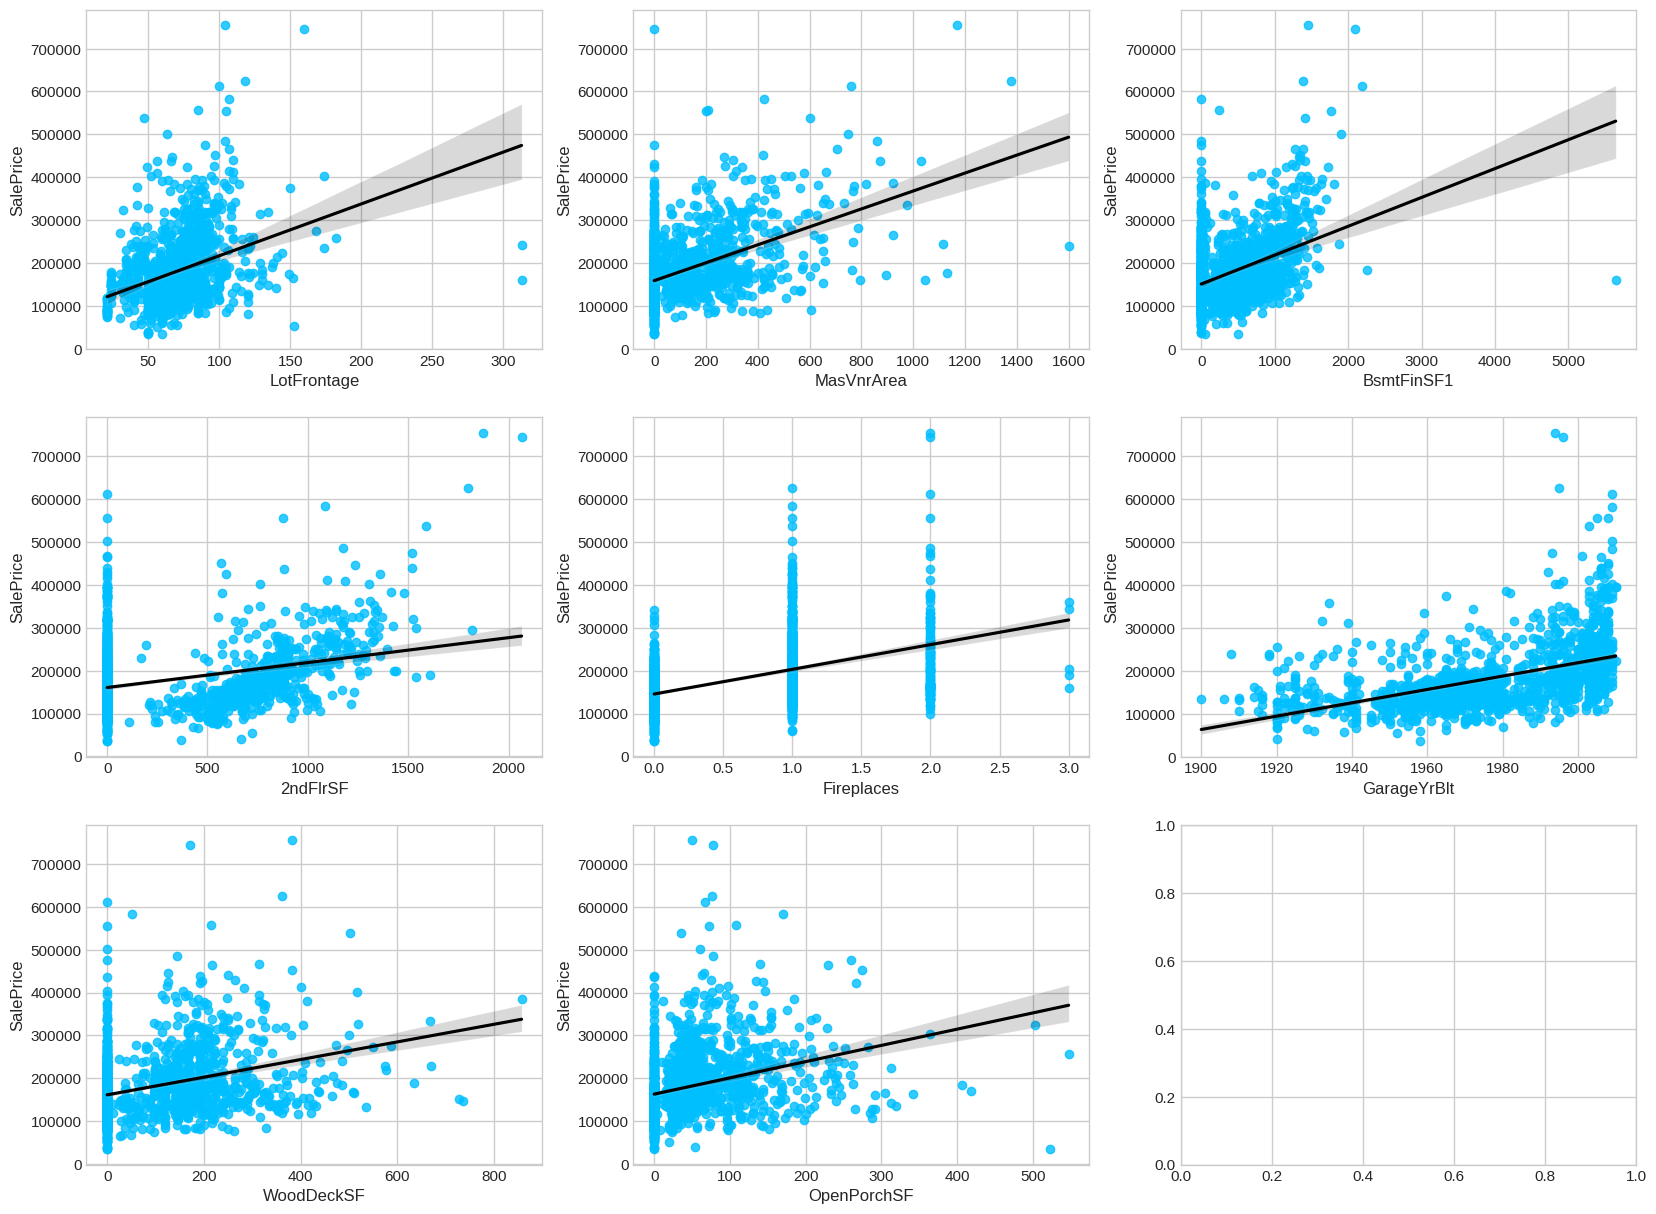

In [ ]:
# Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(
            x=low_features[i],
            y="SalePrice",
            data=df_low_features,
            ax=ax,
            scatter_kws={"color": "deepskyblue"},
            line_kws={"color": "black"}
        )

In [ ]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

In [ ]:
list_of_numerical_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

## I.2.2 Missing data of Numerical features

Train Set

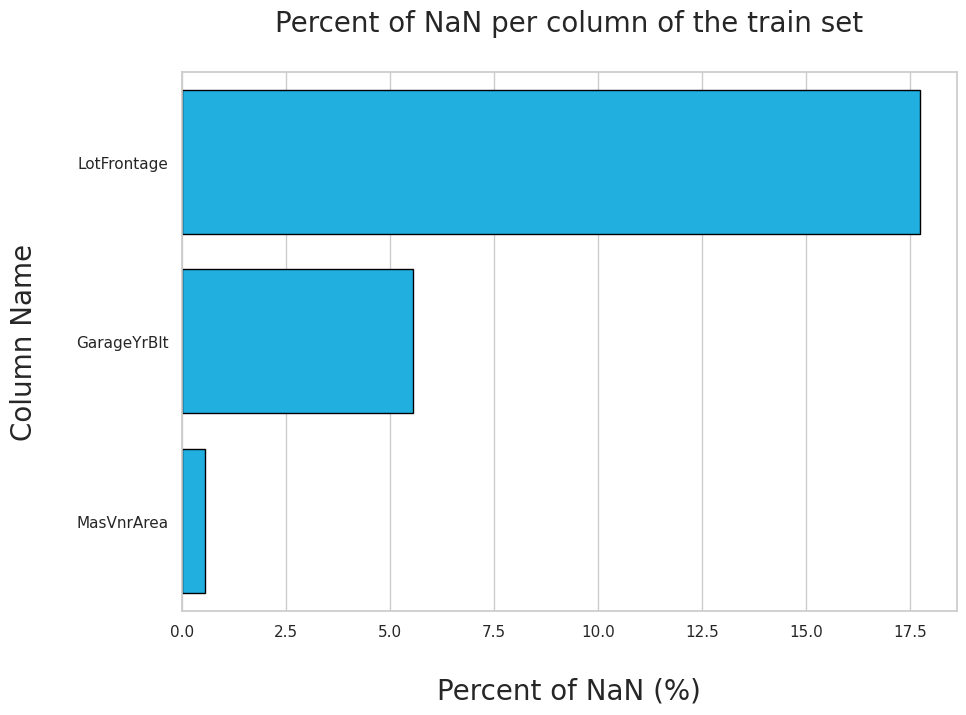

In [ ]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20);

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,65.00,196.00,706.00,854.00,0.00,"2,003.00",0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,80.00,0.00,978.00,0.00,1.00,"1,976.00",298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,68.00,162.00,486.00,866.00,1.00,"2,001.00",0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,60.00,0.00,216.00,756.00,1.00,"1,998.00",0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,84.00,350.00,655.00,"1,053.00",1.00,"2,000.00",192.00,84.00,"250,000.00"


In [ ]:
df_train_imputed.columns = df_train_num.columns
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,65.00,196.00,706.00,854.00,0.00,"2,003.00",0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,80.00,0.00,978.00,0.00,1.00,"1,976.00",298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,68.00,162.00,486.00,866.00,1.00,"2,001.00",0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,60.00,0.00,216.00,756.00,1.00,"1,998.00",0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,84.00,350.00,655.00,"1,053.00",1.00,"2,000.00",192.00,84.00,"250,000.00"


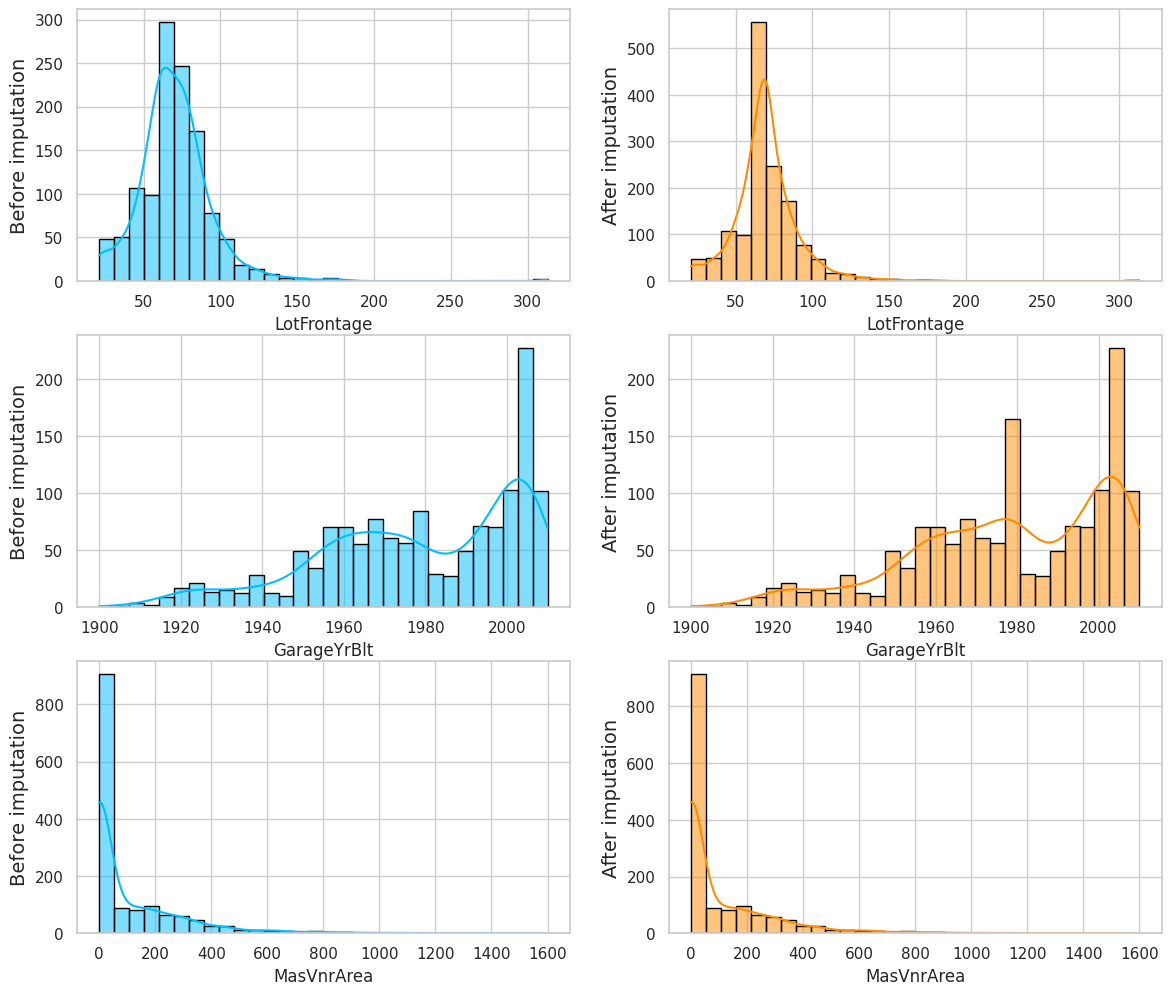

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

In [ ]:
# Drop 'LotFrontage' and 'GarageYrBlt'
# Karena jika diimputasi, akan ada perubahan drastis dari sisi distribusi data
# Mencegah model membuat prediksi yang lebih bias akibat imputasi missing value
df_train_imputed.drop(
    ["LotFrontage", "GarageYrBlt"],
    axis=1,
    inplace=True
)
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,196.00,706.00,854.00,0.00,0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,0.00,978.00,0.00,1.00,298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,162.00,486.00,866.00,1.00,0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,0.00,216.00,756.00,1.00,0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,350.00,655.00,"1,053.00",1.00,192.00,84.00,"250,000.00"


Test Set

In [ ]:
# Drop the same features from test set as for the train set
df_test_num.drop(
    ["LotFrontage", "GarageYrBlt"],
    axis=1,
    inplace=True
)

Text(0, 0.5, 'Column Name\n')

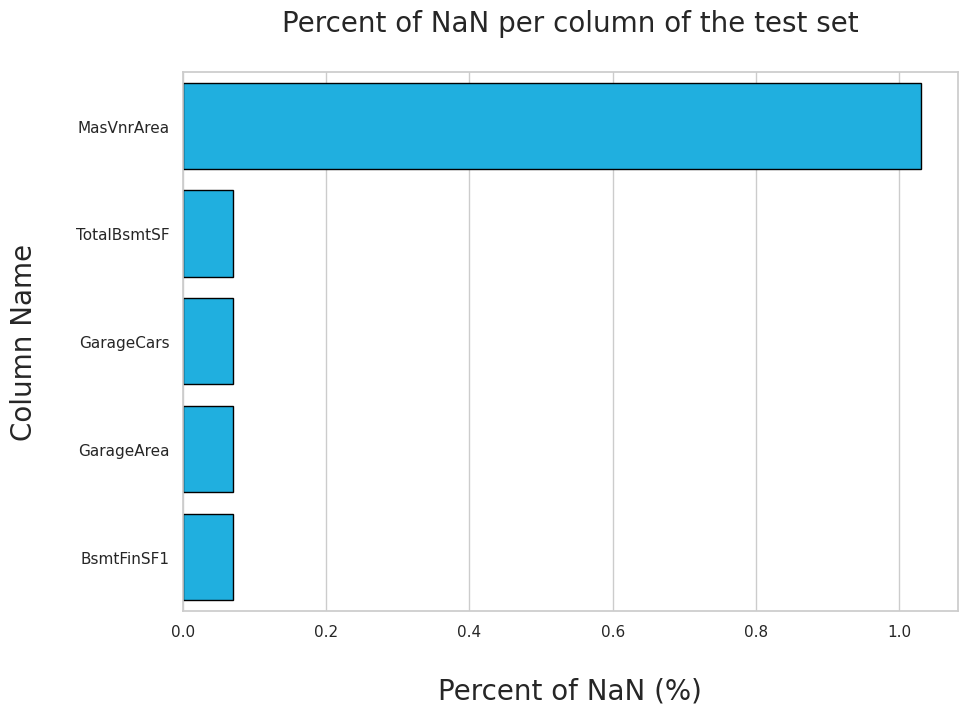

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

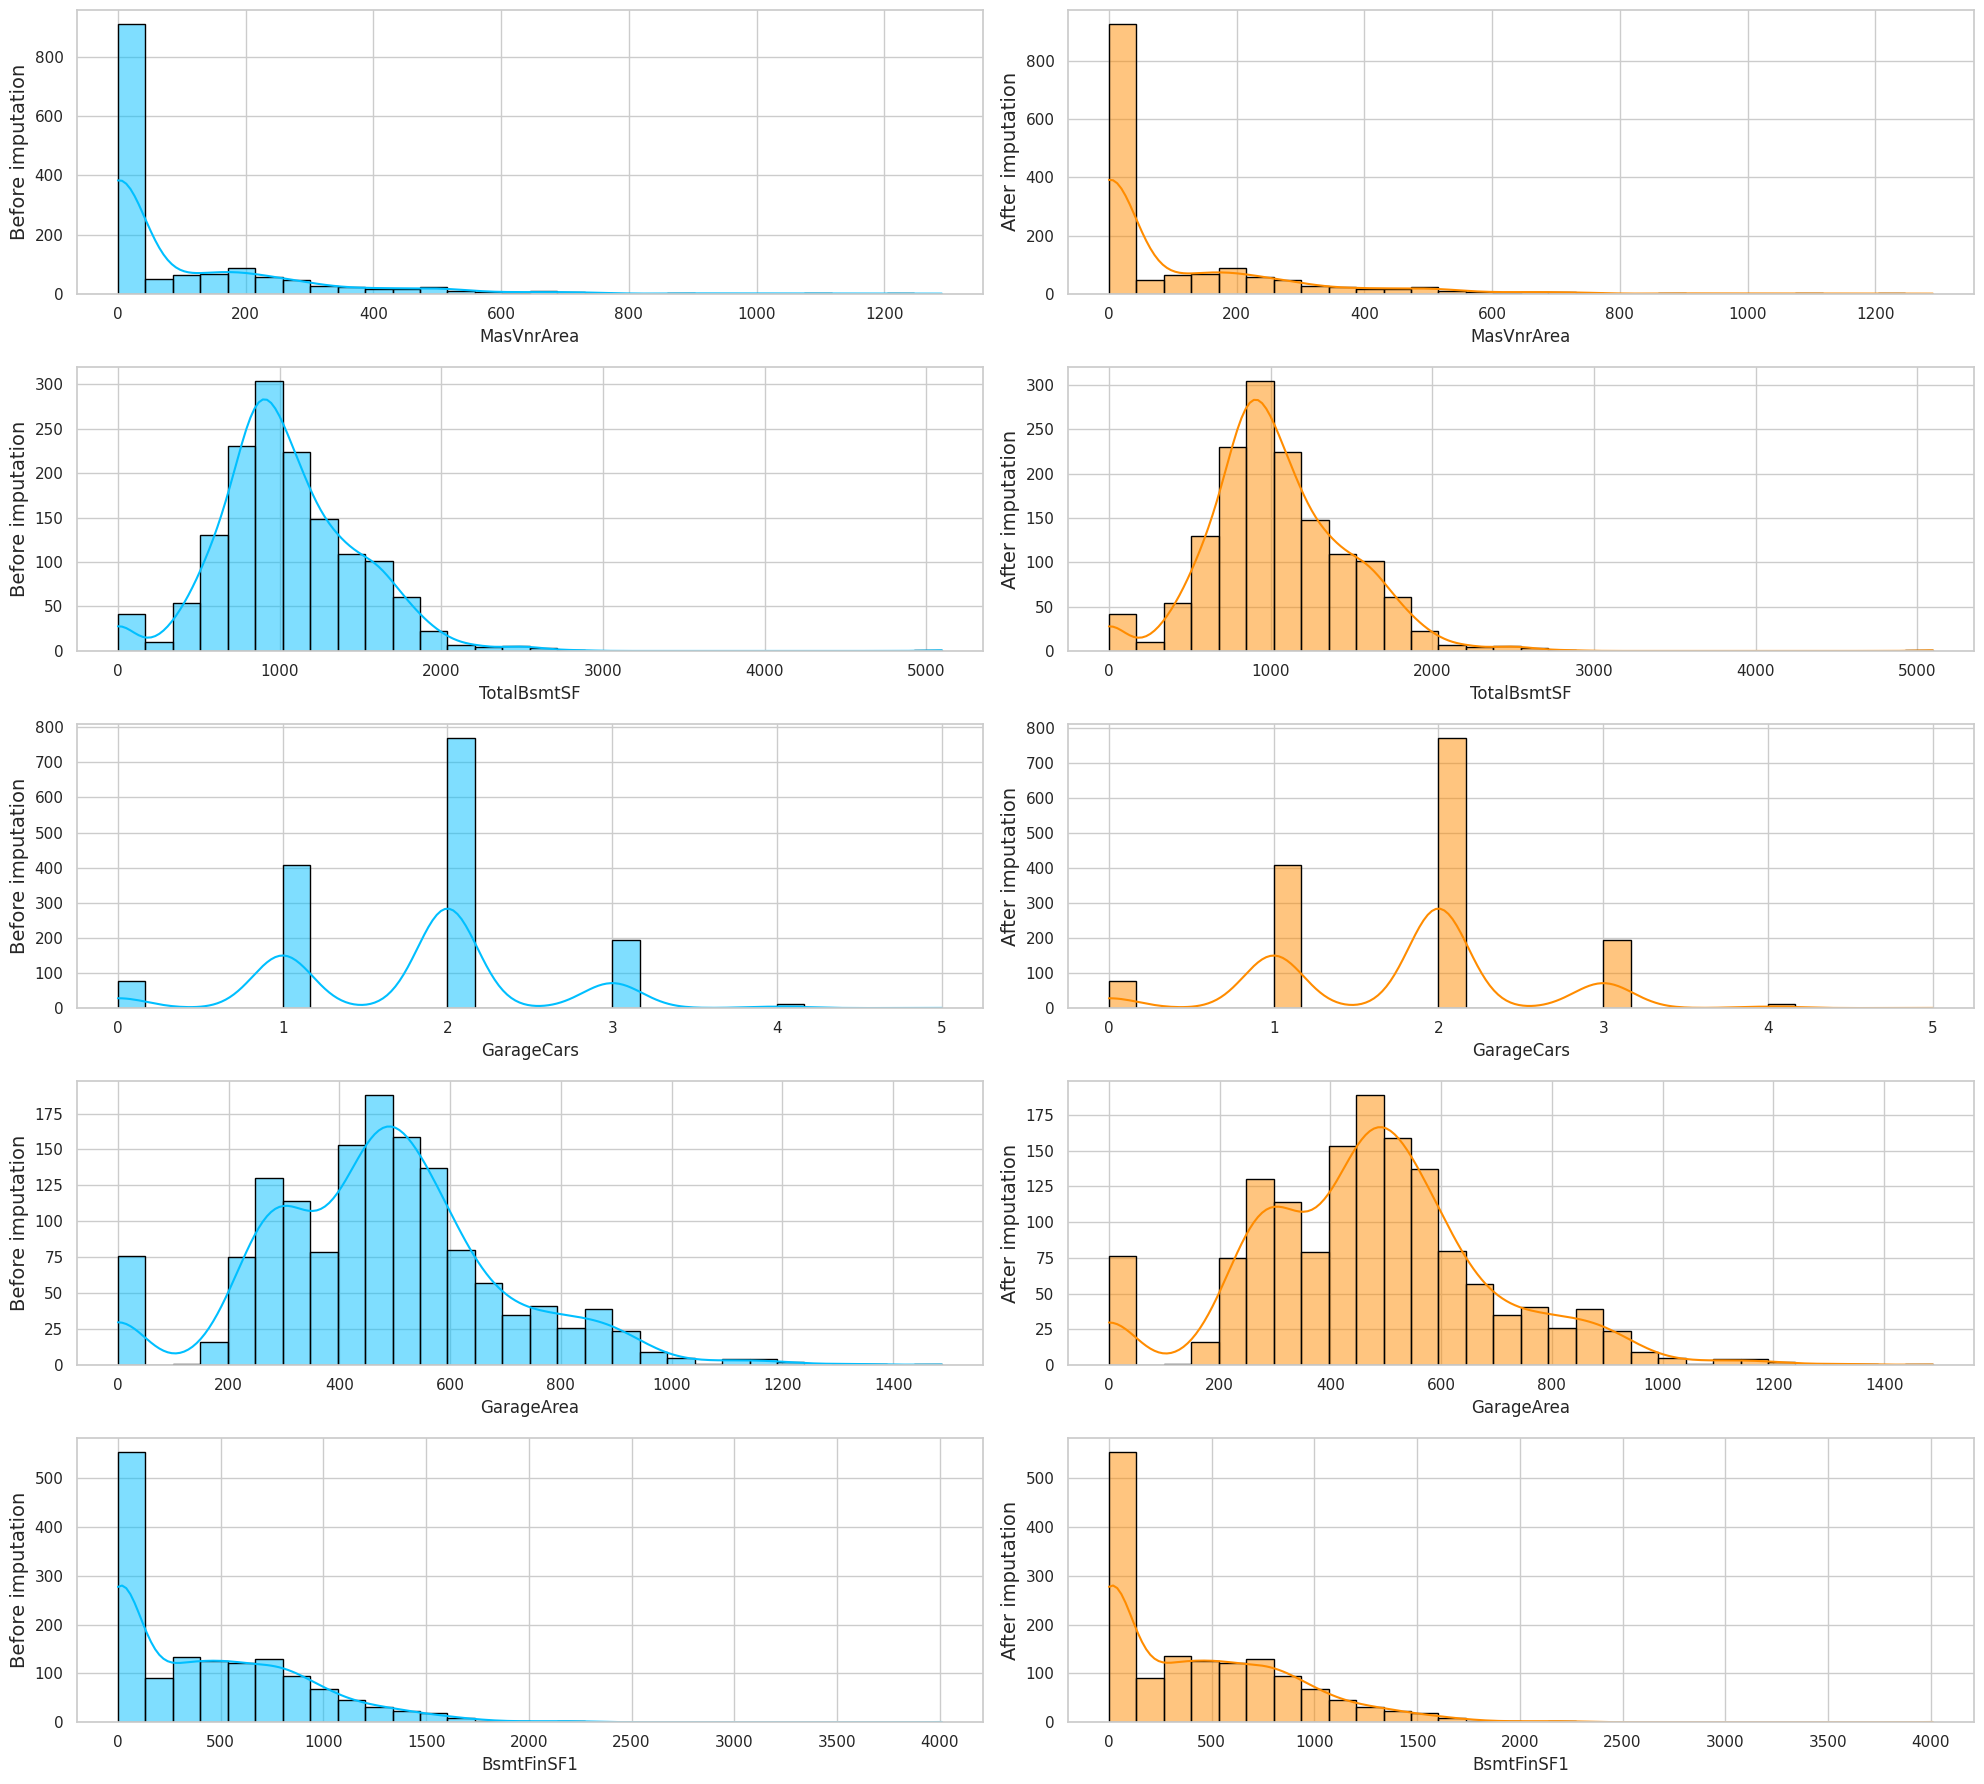

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

fig.tight_layout()

Hasil imputasi tidak merubah secara signifikan dari data, akibat proporsi missing value yang kecil

# I.3 Categorical features

## I.3.1. Explore and Clean Categorical features

In [ ]:
# Categorical to Quantitative relationship

# categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"] # -->list comprehension

# for-loop
categorical_features = []
for feat, feat_type in zip(df_train.columns, df_train.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

# Include target variable
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

df_test_categ.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [ ]:
df_train_categ['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [ ]:
import warnings
warnings.filterwarnings("ignore")

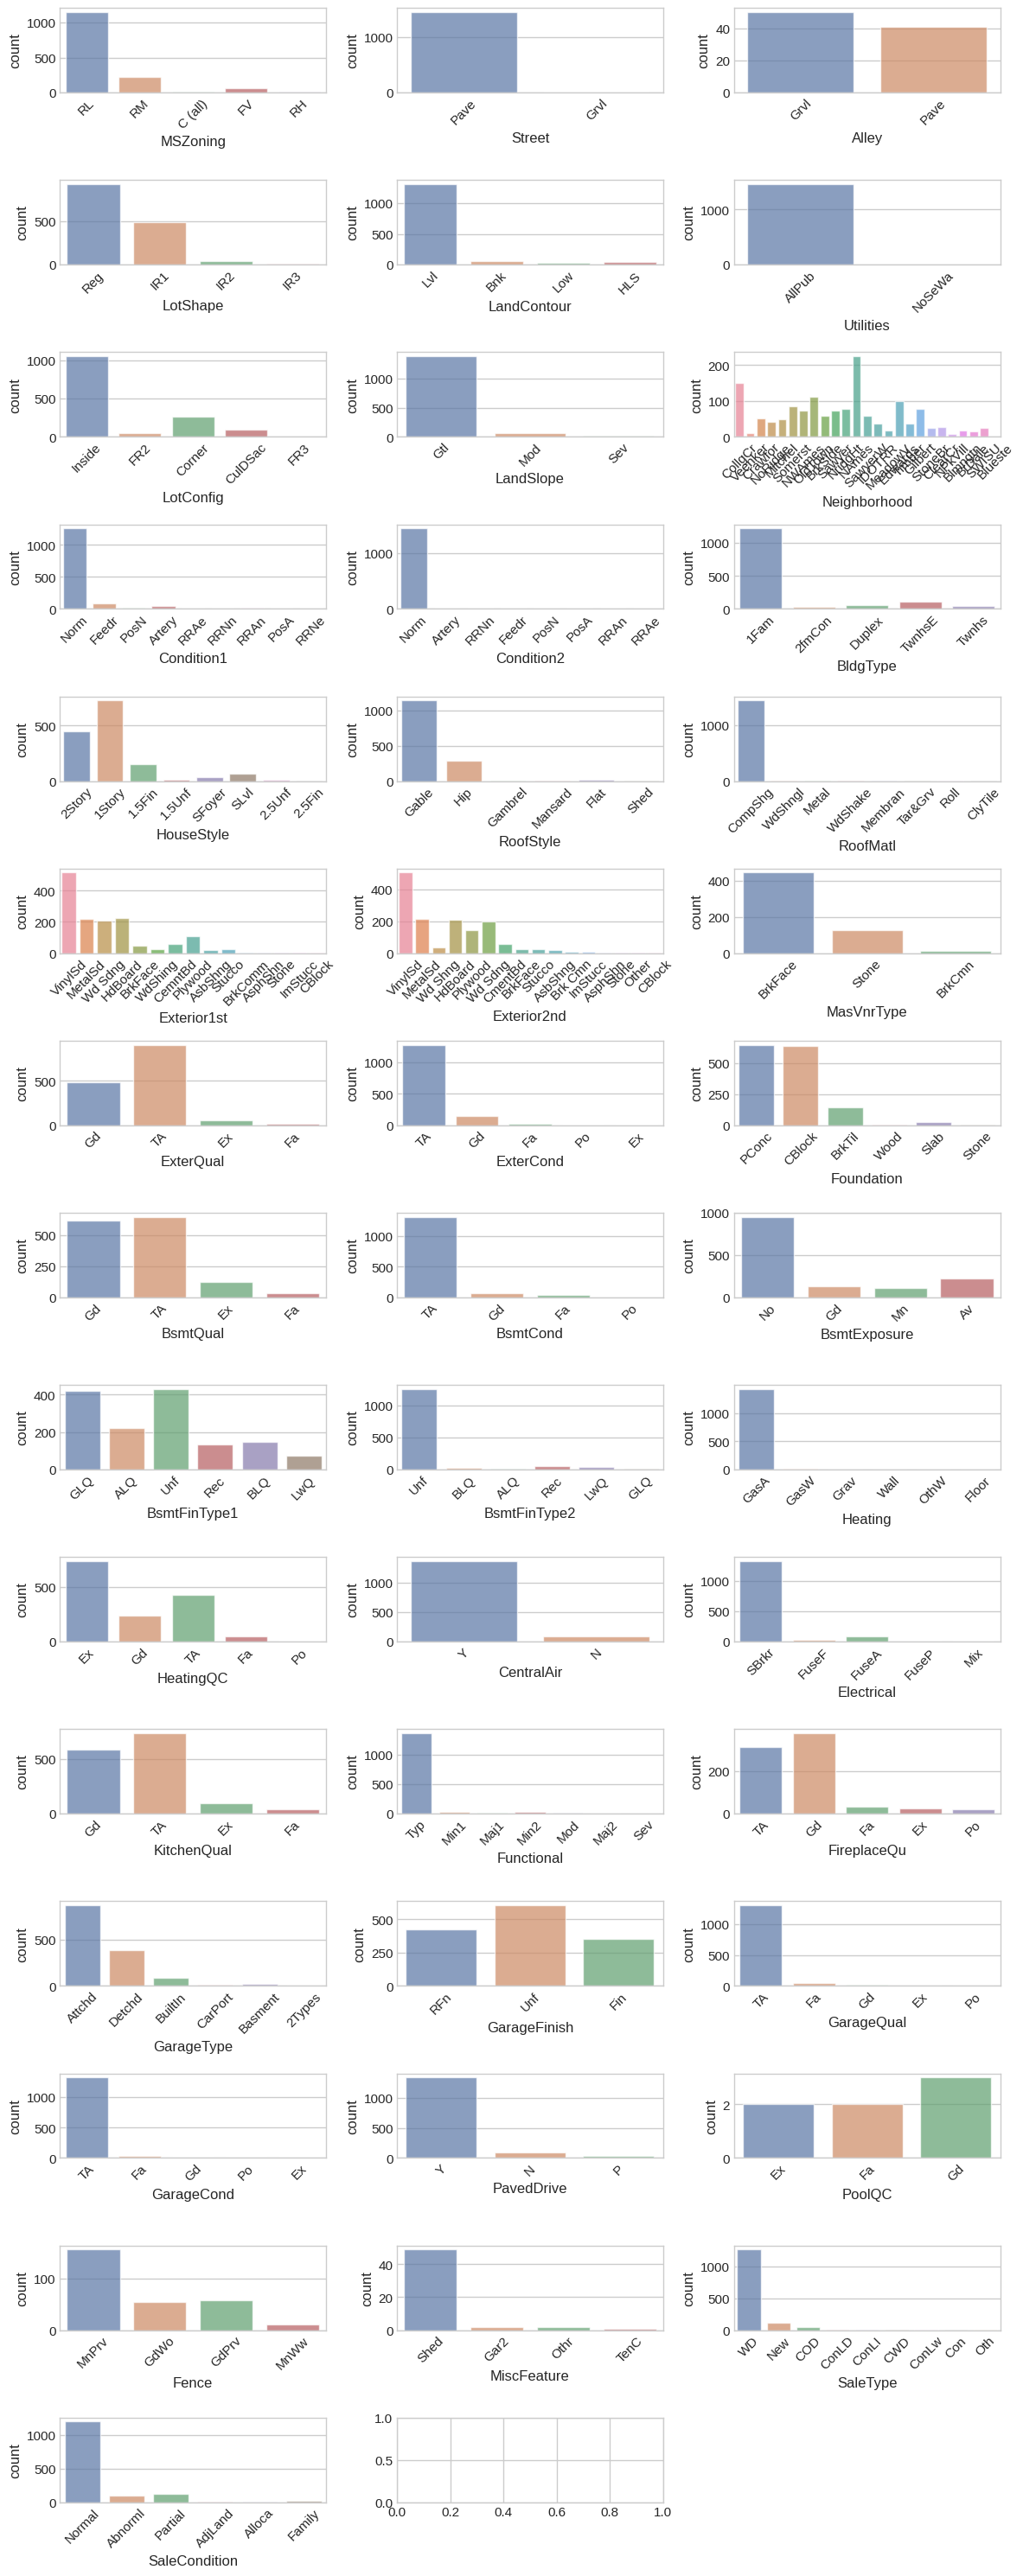

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        sns.countplot(
            x=df_train_categ.columns[i], alpha=0.7,
            data=df_train_categ, ax=ax, legend=False,
            hue=df_train_categ.columns[i])
        ax.set_xticklabels(
            ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()
fig.delaxes(axes[-1, -1])

In [ ]:
# Drop some categorical 'non-informative' features from train set
columns_to_drop = [
    'Street', 'Alley', 'LandContour',
    'Utilities', 'LandSlope', 'Condition2',
    'RoofMatl', 'CentralAir', 'BsmtFinType2',
    'Heating', 'Functional', 'GarageQual',
    'GarageCond','ExterCond','MiscFeature',
    'PavedDrive', 'SaleType'
]

In [ ]:
# Train set
df_train_categ.drop(columns_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(columns_to_drop, axis=1, inplace=True)

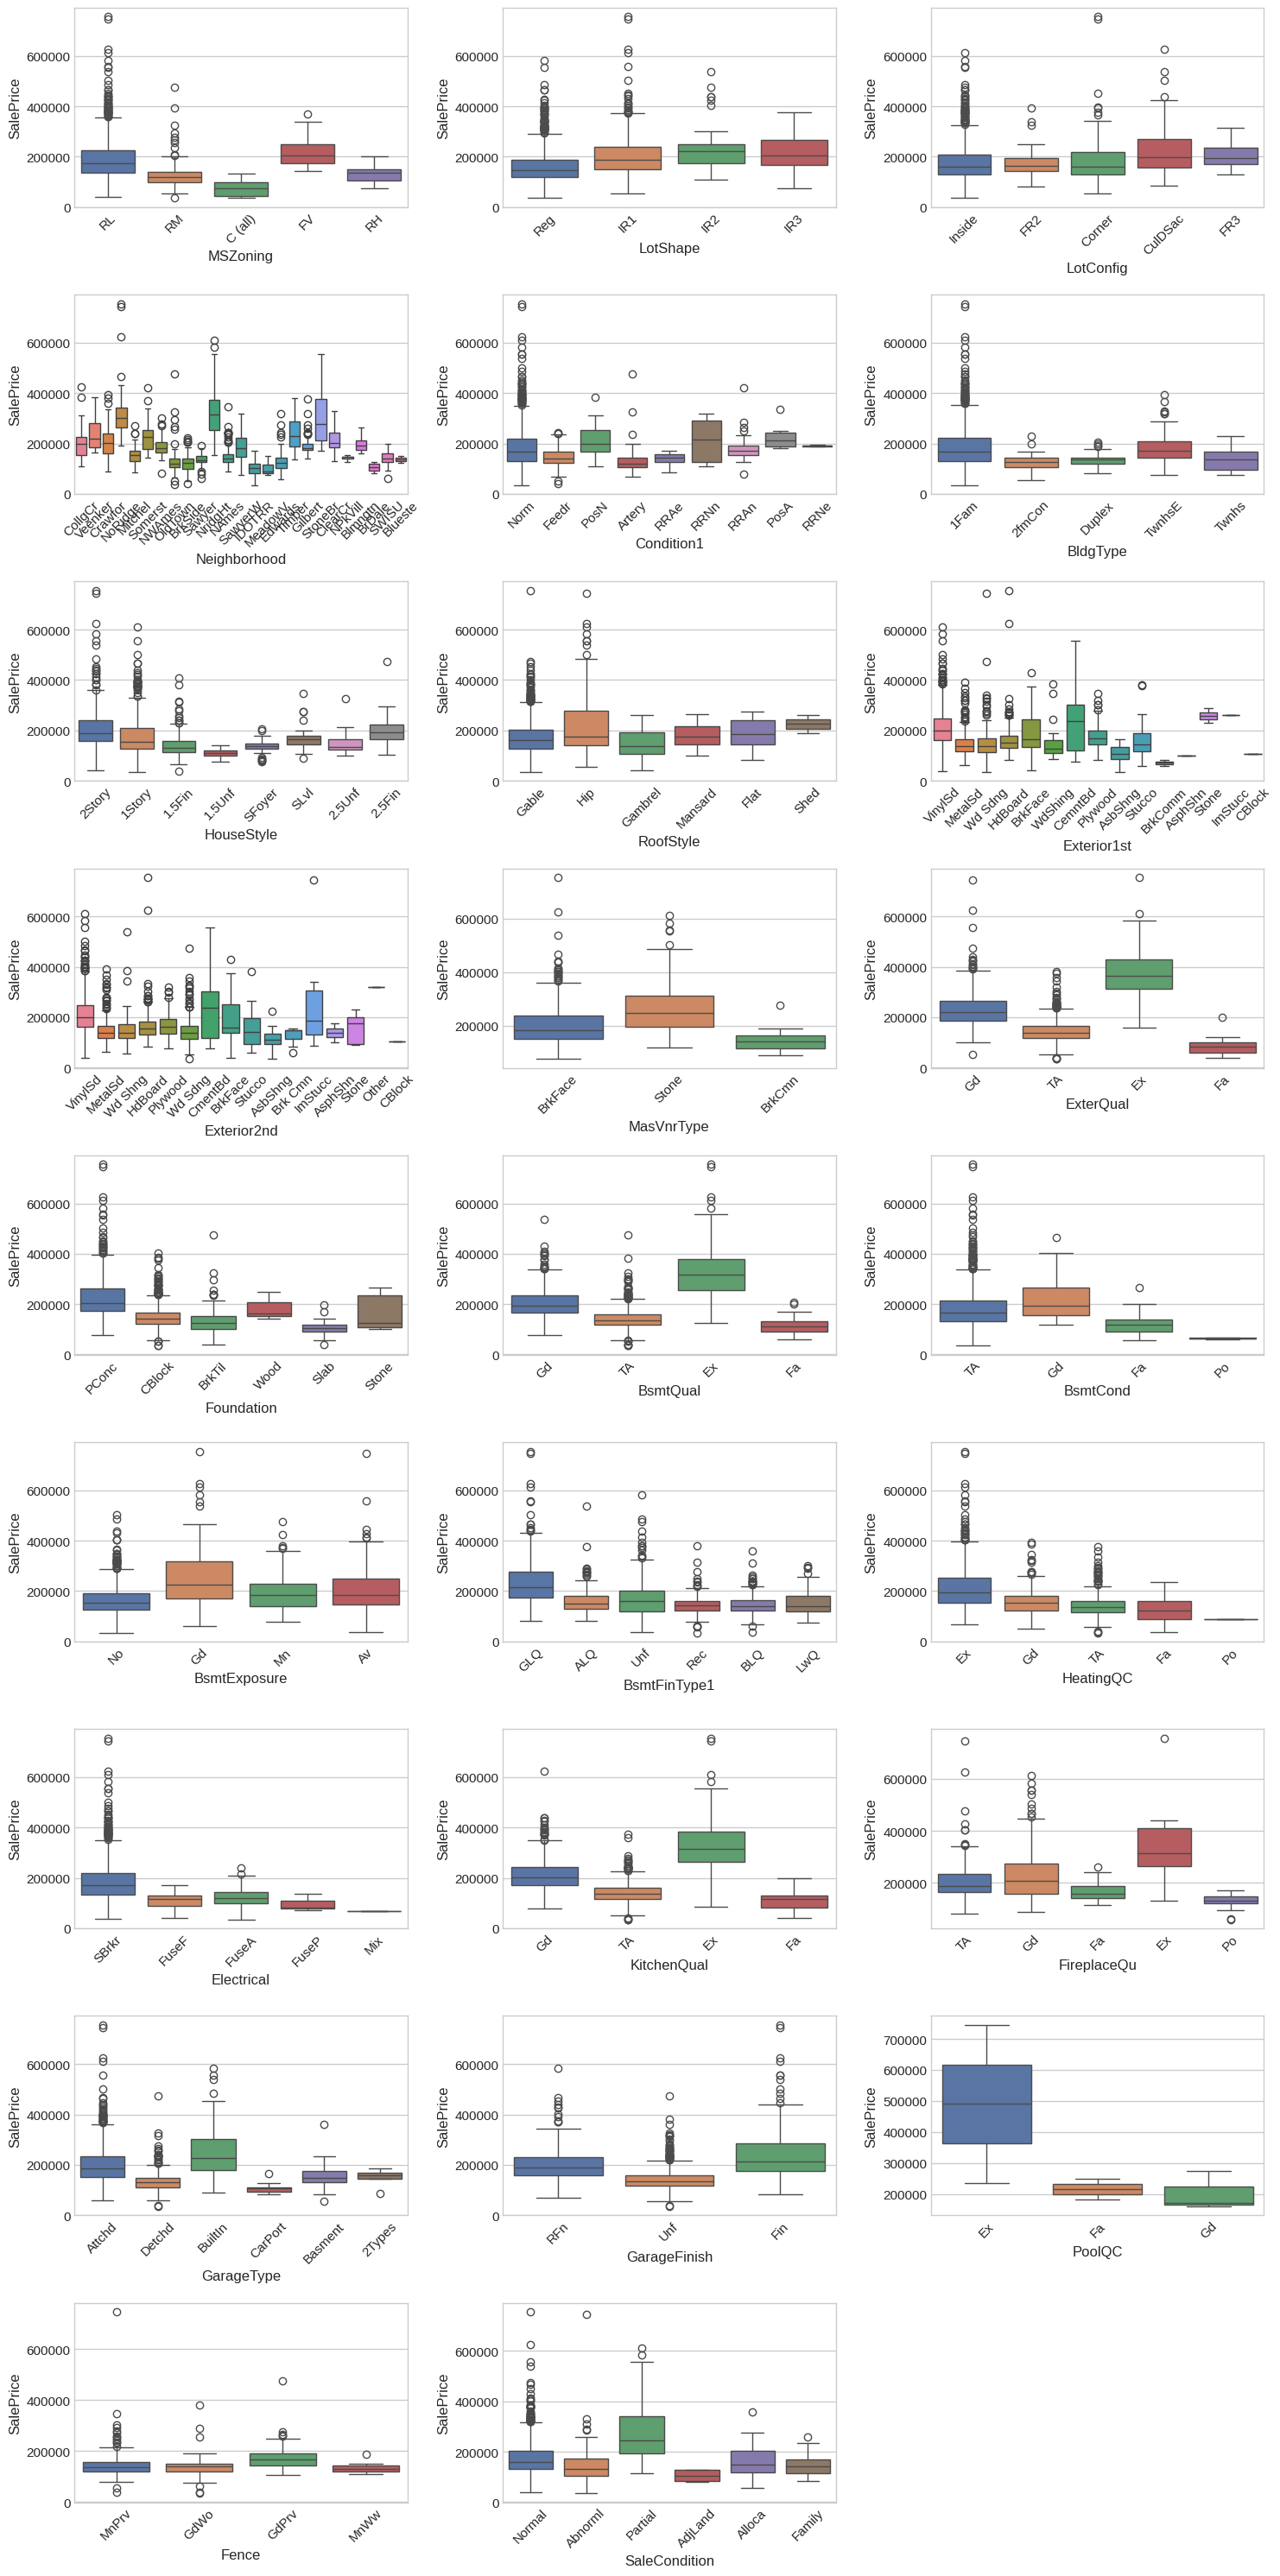

In [ ]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        sns.boxplot(
            x=df_train_categ.columns[i], y="SalePrice",
            data=df_train_categ, legend=False, ax=ax,
            hue=df_train_categ.columns[i])
        ax.set_xticklabels(
            ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()
fig.delaxes(axes[-1, -1])

In [ ]:
df_train_categ["Exterior1st"].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [ ]:
df_train_categ["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

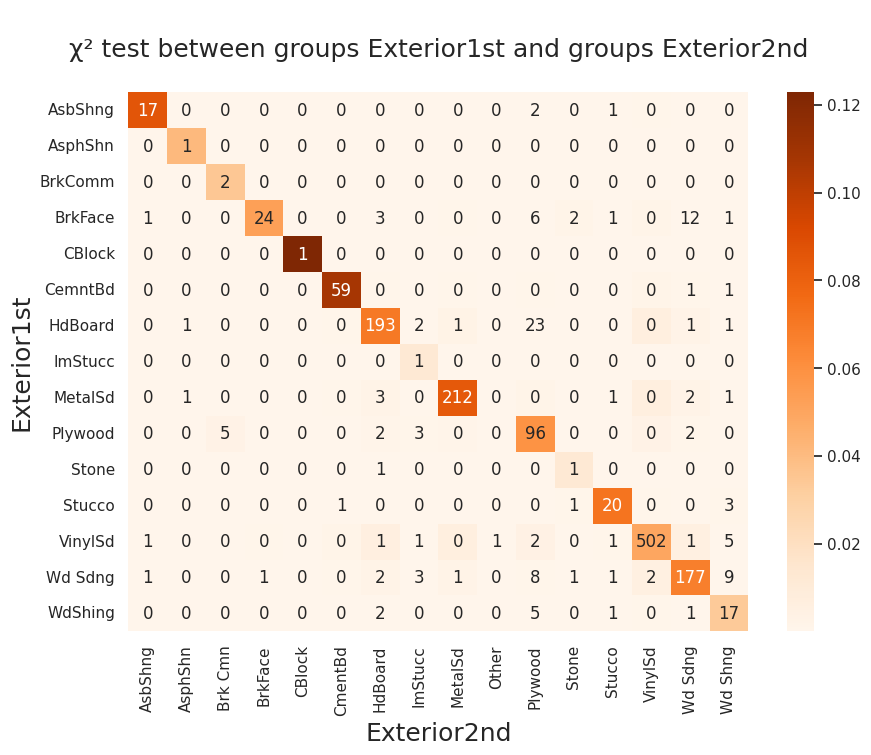

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



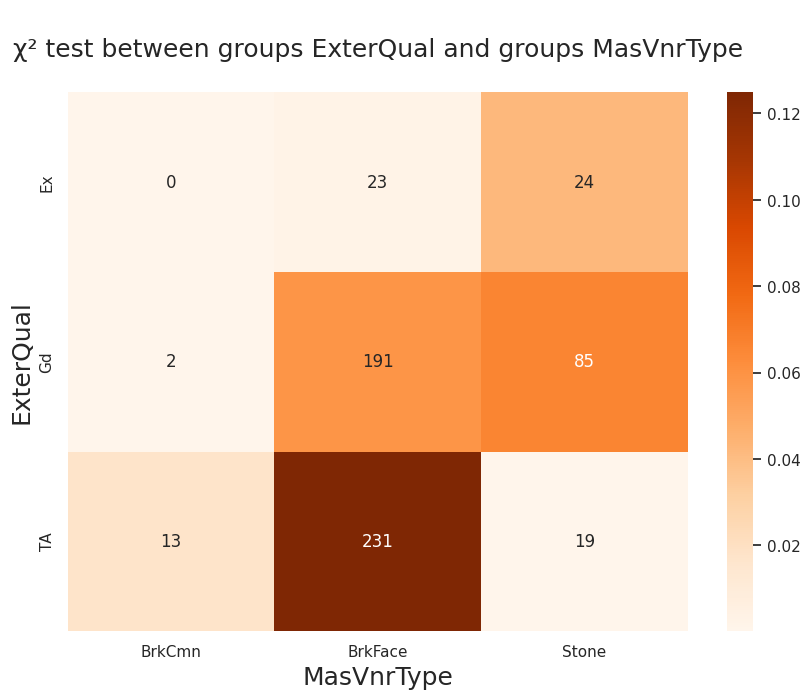

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.1626591994363518e-15



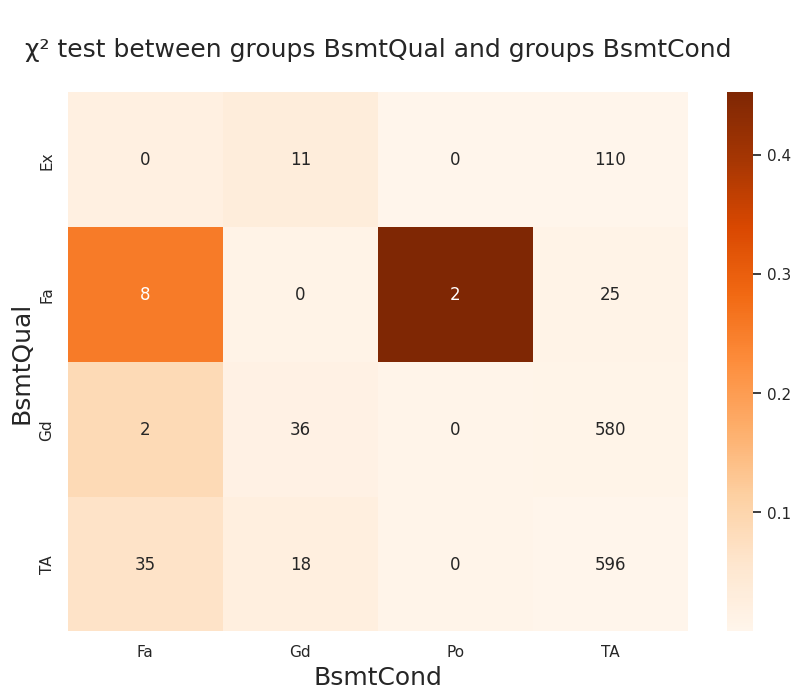

P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31



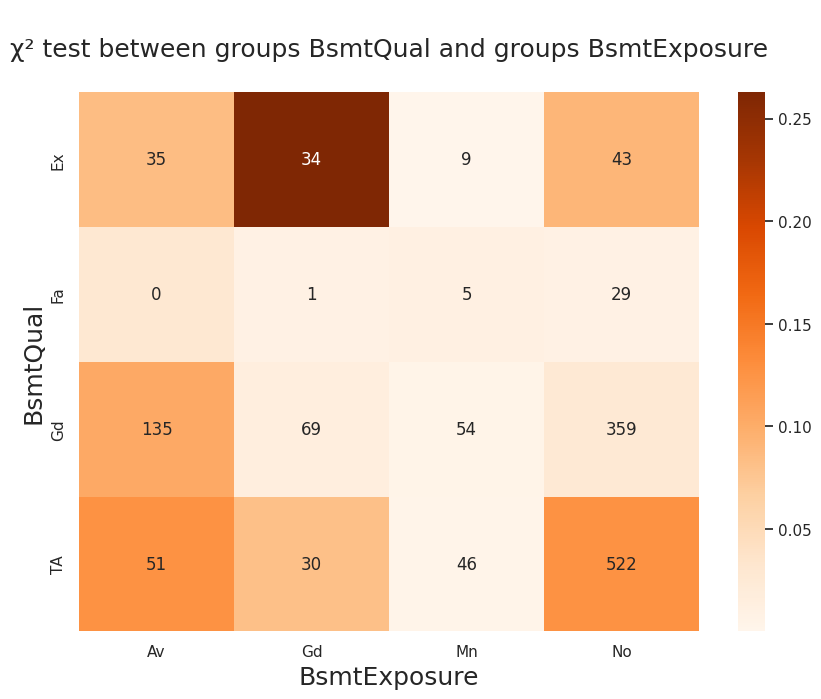

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [ ]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i,
        columns=j,
        aggfunc=len,
        margins=True,
        margins_name="Total"
    )

    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)

    # P-Value is the Probability of H0 being True
    print(f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

Dalam analisis uji chi-square, indikasi bahwa dua atau lebih variabel kategorikal memiliki hubungan erat adalah ketika nilai-nilai yang diamati dalam contingency table berbeda secara signifikan dari nilai-nilai yang diharapkan jika tidak ada hubungan antara variabel-variabel tersebut.

- Hipotesis Awal (Null Hypothesis, H0):
Hipotesis awal adalah bahwa **tidak ada hubungan** antara dua atau lebih variabel kategorikal. Dinyatakan sebagai "Tidak ada perbedaan antara variabel-variabel yang diamati dan yang diharapkan jika tidak ada hubungan antara mereka."

- Hipotesis Alternatif (Alternative Hypothesis, Ha):
Hipotesis alternatif menyatakan bahwa **ada hubungan** antara dua atau lebih variabel kategorikal. Dinyatakan sebagai "Ada perbedaan antara variabel-variabel yang diamati dan yang diharapkan jika tidak ada hubungan antara mereka."


Jika p-value lebih kecil dari tingkat signifikansi yang ditetapkan, maka kita akan menolak hipotesis nol dan menerima hipotesis alternatif. Namun, jika p-value lebih besar dari tingkat signifikansi, kita gagal menolak hipotesis nol.

In [ ]:
# Let's drop the one of each co-dependent variables
# Train set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

## I.3.2 Missing data of Categorical features

Train Set

Text(0, 0.5, 'Column Name\n')

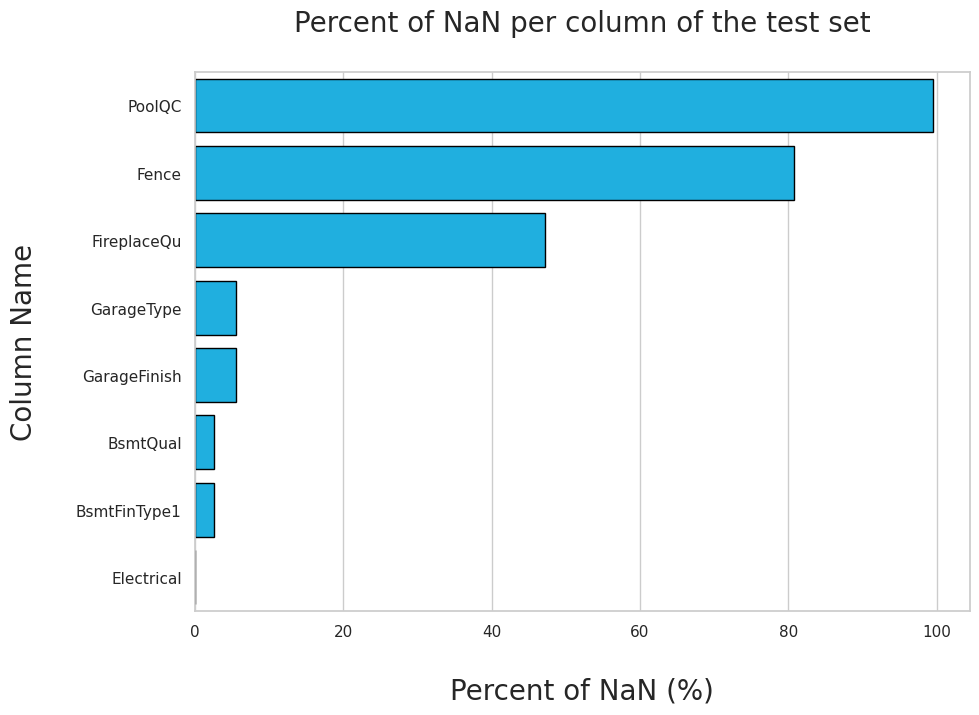

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
tab[tab.Percent_NaN > 5]

,Column,Percent_NaN
6,PoolQC,99.52
7,Fence,80.75
3,FireplaceQu,47.26
4,GarageType,5.55
5,GarageFinish,5.55


In [ ]:
# Drop the features where the percentage of NaN is higher than 5%
# Why? Imputasi akan merubah distribusi secara signifikan
df_train_categ.drop(
    ["PoolQC", "Fence", "FireplaceQu", "GarageType", "GarageFinish"],
    axis=1,
    inplace=True
)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {
    "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
    "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
    "Electrical": df_train_categ["Electrical"].mode().iloc[0]
}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

Test Set

In [ ]:
# Drop the same features from test set as for the train set
df_test_categ.drop(
    ["PoolQC", "Fence", "FireplaceQu","GarageType", "GarageFinish"],
    axis=1,
    inplace=True
)

Text(0, 0.5, 'Column Name\n')

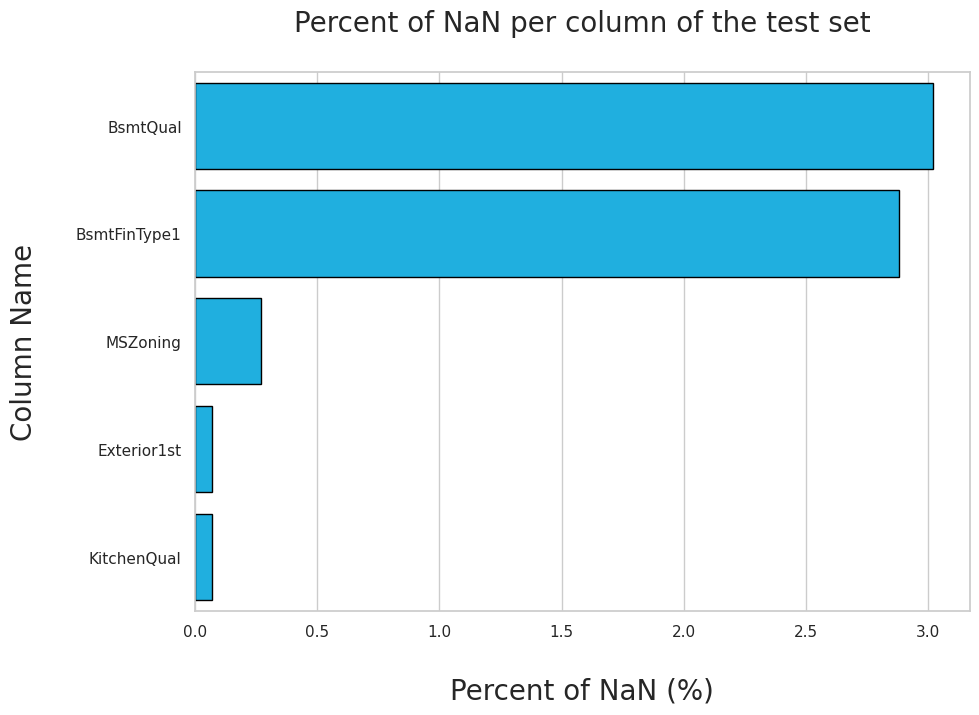

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {
    "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
    "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
    "MSZoning": df_train_categ["MSZoning"].mode().iloc[0],
    "Exterior1st": df_train_categ["Exterior1st"].mode().iloc[0],
    "KitchenQual": df_train_categ["KitchenQual"].mode().iloc[0]
}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)

## I.3.3. Transform Categorical features into One-Hot Encoded features (get_dummies)

In [ ]:
# Train set
for i in df_train_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_train_categ[i], prefix=i)

    # merge both tables
    df_train_categ = df_train_categ.join(df_dummies)

# Select the binary features only
df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Test set
for i in df_test_categ.columns.tolist():
    df_dummies = pd.get_dummies(df_test_categ[i], prefix=i)

    # merge both tables
    df_test_categ = df_test_categ.join(df_dummies)

# Select the binary features only
df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Let's check if the column headings are the same in both data set, df_train and df_test
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Features present in df_test_categ set and absent in df_train_categ: []


In [ ]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data set
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


# I.4. Merge numerical and binary features into one data set

In [ ]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 135)
Test set: (1459, 134)


## I.5. Drop outliers from the train set

<Axes: ylabel='OpenPorchSF'>

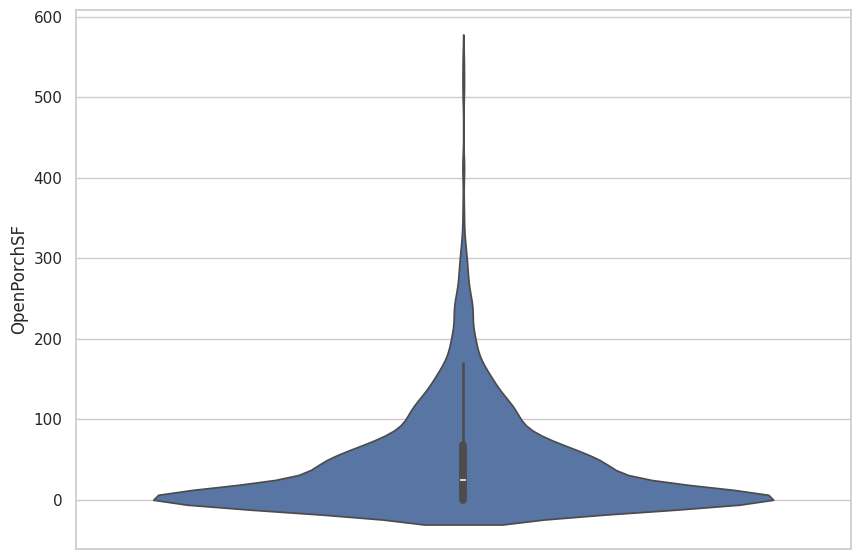

In [ ]:
sns.violinplot(data=df_train, y="OpenPorchSF")

In [ ]:
# Drop "WoodDeckSF" and "OpenPorchSF" --> See Numerical Features Viz
df_train_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)
df_test_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)

In [ ]:
df_train_new[(df_train_new["GrLivArea"] > 4000) & (df_train_new["SalePrice"] <= 200000)]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
523,10.00,"2,007.00","2,008.00","3,138.00","3,138.00","4,676.00",3.00,11.00,3.00,884.00,...,True,False,False,False,False,False,False,False,False,True
1298,10.00,"2,008.00","2,008.00","6,110.00","4,692.00","5,642.00",2.00,12.00,2.00,"1,418.00",...,True,False,False,False,False,False,False,False,False,True


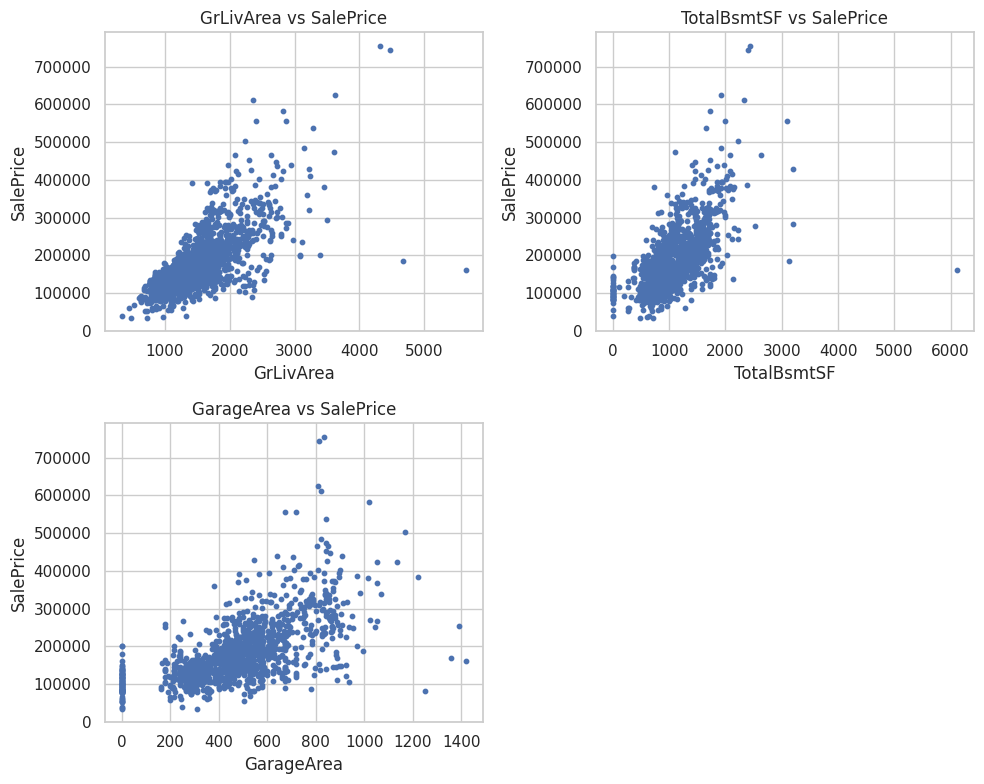

In [ ]:
# Finding Outliers

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Features to plot
features = ["GrLivArea", "TotalBsmtSF", "GarageArea"]

# Iterate over each feature and plot against SalePrice
for i, feature in enumerate(features):
    ax = axs[i]
    ax.scatter(df_train_new[feature], df_train_new['SalePrice'], s=10)
    ax.set_title(f'{feature} vs SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')

# Hide the last subplot
axs[-1].axis('off')
fig.tight_layout()
plt.show()

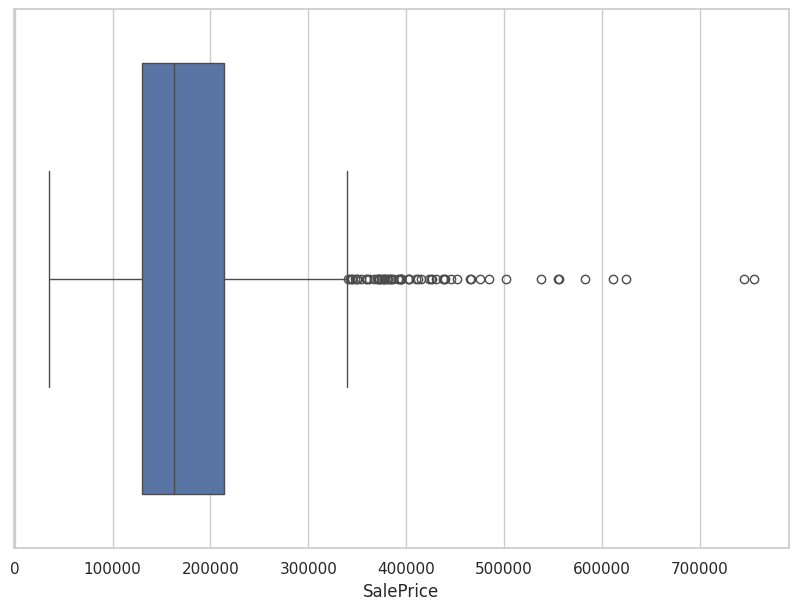

In [ ]:
# Create a boxplot using Seaborn
sns.boxplot(x='SalePrice', data=df_train_new);

In [ ]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"

# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (
    df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


# II. Feature engineering

In [ ]:
# Define a function to calculate the occupancy rate of the first floor of the total living area


def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]


# Apply the function on train and test set
df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1)

# Drop "1stFlrSF" and "2ndFlrSF"
df_train_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
df_test_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [ ]:
# Define a function to calculate the occupancy rate of the finished basement area


def bsmt_finish(x):
    """Propotion of finished area in basement

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]


# Apply the function on train and test set
df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1)

df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1)

# Drop "BsmtFinSF1"
df_train_new.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_test_new.drop(["BsmtFinSF1"], axis=1, inplace=True)

In [ ]:
# Convert Year of construction to Age of the house since the construction
df_train_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"]

df_test_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_test_new["YearBuilt"]

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [ ]:
df_train_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"]

df_test_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"]

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [ ]:
# See Numerical Feature Viz
continuous_features = [
    "OverallQual", "TotalBsmtSF", "GrLivArea",
    "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea",
    "MasVnrArea", "Fireplaces", "1stFlrPercent",
    "BsmtFinPercent", "AgeSinceConst", "AgeSinceRemod"
]

df_skew_verify = df_train_new.loc[:, continuous_features]

In [ ]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame(
    {
        "Columns": continuous_features,
        "Abs_Skew": skew_ft
    }
)

sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['GrLivArea', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [ ]:
# Log transformation of the skewed features
# sf_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "GarageArea"]

for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Train set
    df_train_new[i] = np.log((df_train_new[i])+1)

    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

# III. Preparing data for modeling

## III.1 Target variable 'SalePrice'

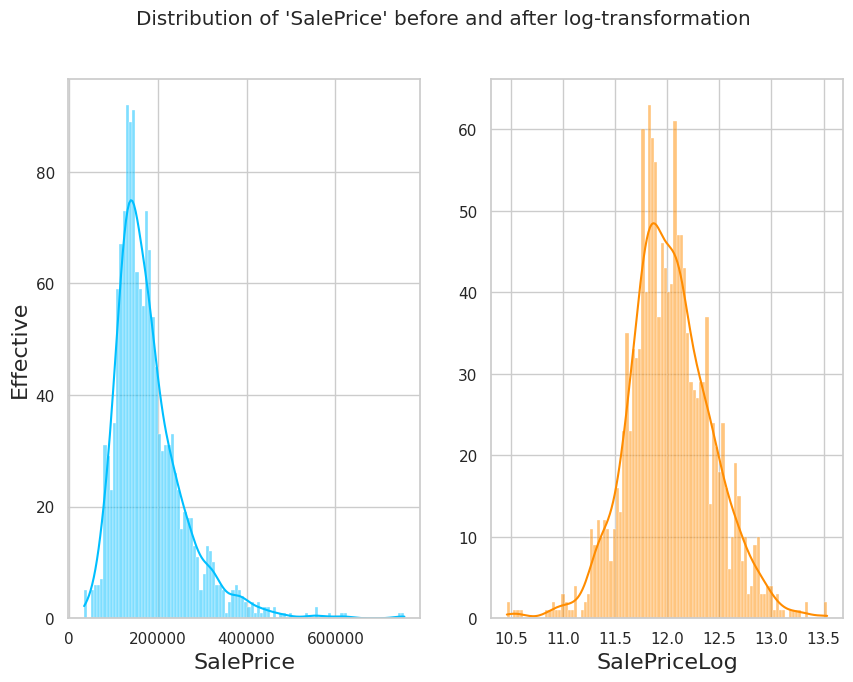

In [ ]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df_train_new["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effective", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df_train_new["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16);

In [ ]:
# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

## III.2. Split data into train and test set and Standardization

In [ ]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(df_train_new.columns) if i != "SalePriceLog"]]
# X = df_train_new.drop(columns=["SalePriceLog"])
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 131)
(1454,)


Text(0.5, 1.0, 'Histogram for SalePriceLog')

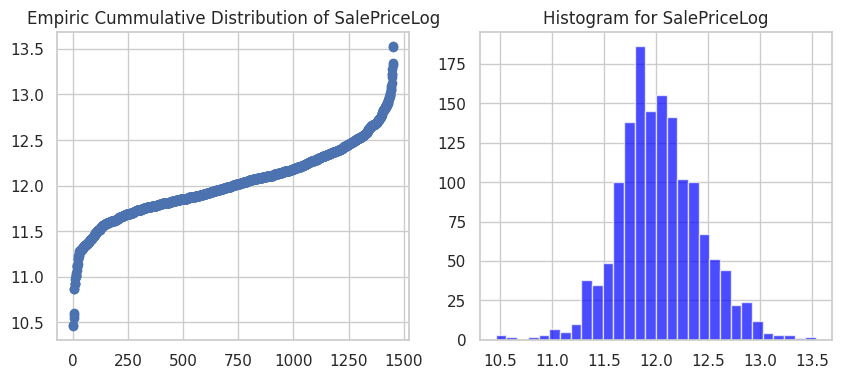

In [ ]:
# Visualization on 'SalePriceLog'

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot Empiric Cummulative Distribution
sorted_data = y.sort_values(ignore_index=True)
axs[0].scatter(x=sorted_data.index, y=sorted_data)
axs[0].set_title('Empiric Cummulative Distribution of SalePriceLog')

# Plot histogram of 'SalePrice'
axs[1].hist(y, bins=30, color='blue', alpha=0.7)
axs[1].set_title('Histogram for SalePriceLog')

In [ ]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(min(y) + 0.5, max(y) - 0.5, 10)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, shuffle=True)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 131)
y_train:(1163,)

X_test:(291, 131)
y_test:(291,)


In [ ]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

## III.3. Backward Stepwise Regression
Source: [Link](https://www.analystsoft.com/en/products/statplus/content/help/pdf/analysis_regression_backward_stepwise_elimination_regression_model.pdf)

Backward Stepwise Regression adalah metode dalam analisis regresi yang digunakan untuk membangun model regresi dengan cara memulai dengan model yang sudah terdapat semua prediktor, kemudian secara bertahap menghapus prediktor-prediktor yang dianggap tidak signifikan atau kurang relevan satu per satu dari model, hingga hanya tersisa prediktor-prediktor yang dianggap signifikan.

Prosesnya dimulai dengan membangun model regresi dengan menggunakan semua prediktor yang tersedia. Kemudian, langkah demi langkah, prediktor yang memiliki koefisien regresi yang tidak signifikan (biasanya ditentukan berdasarkan nilai p-value yang melebihi ambang batas yang telah ditetapkan, misalnya 0.05) akan dihapus satu per satu dari model. Setiap kali prediktor dihapus, model akan dianalisis ulang untuk memastikan bahwa penghapusan prediktor tersebut tidak mempengaruhi signifikansi prediktor lainnya dalam model.

Tujuan dari Backward Stepwise Regression adalah untuk menyederhanakan model regresi sehingga hanya menyertakan prediktor-prediktor yang benar-benar penting atau signifikan dalam menjelaskan variabilitas variabel respons, sehingga memudahkan interpretasi model dan mengurangi risiko overfitting. Metode ini sangat berguna terutama ketika jumlah prediktor dalam model sangat besar dan kita ingin memilih hanya prediktor-prediktor yang paling berpengaruh.

Algoritma Backward Stepwise Regression:

Berikut adalah algoritma Backward Stepwise Regression secara umum:

1. Bangun model regresi menggunakan semua prediktor yang tersedia.
2. Lakukan uji hipotesis untuk menentukan signifikansi masing-masing koefisien regresi (misalnya, menggunakan nilai p-value dengan ambang batas tertentu, seperti 0.05).
3. Identifikasi prediktor dengan koefisien regresi yang tidak signifikan (p-value melebihi ambang batas yang ditetapkan).
4. Hapus satu prediktor yang tidak signifikan tersebut dari model.
5. Rekonstruksi ulang model tanpa prediktor yang dihapus.
6. Ulangi langkah 2-5 hingga semua prediktor dalam model dianggap signifikan (semua p-value kurang dari ambang batas yang ditetapkan).
7. Selesaikan proses ketika tidak ada lagi prediktor yang dapat dihapus dari model.
8. Evaluasi dan validasi model yang dihasilkan.


In [ ]:
def backward_regression(
        X, y, initial_list=[],
        threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if p-values is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    print(f"\nSelected Features:\n{included}")
    return included

# Application of the backward regression function on our training data
Selected_Features = backward_regression(X_train, y_train)

worst_feature : BsmtQual_Gd, 0.9976308565329102 
worst_feature : 1stFlrPercent, 0.9900522778084074 
worst_feature : Exterior1st_Wd Sdng, 0.9864009378355714 
worst_feature : Neighborhood_SWISU, 0.9805486376130317 
worst_feature : Neighborhood_Timber, 0.9993689691140771 
worst_feature : Neighborhood_SawyerW, 0.9948200784732943 
worst_feature : HouseStyle_SFoyer, 0.9798619297943507 
worst_feature : Neighborhood_Gilbert, 0.9748939439852677 
worst_feature : BldgType_2fmCon, 0.9515758865032589 
worst_feature : HouseStyle_2.5Unf, 0.9320439789297206 
worst_feature : LotShape_IR1, 0.9153791592727551 
worst_feature : LotShape_IR3, 0.9042373186597629 
worst_feature : Neighborhood_Blmngtn, 0.8758914063236564 
worst_feature : Exterior1st_CBlock, 0.8801239029948461 
worst_feature : MasVnrArea, 0.8724082287474192 
worst_feature : Condition1_PosA, 0.8470288637227461 
worst_feature : HeatingQC_Po, 0.9851064284332622 
worst_feature : Condition1_PosN, 0.9452791533928295 
worst_feature : Condition1_Artery

In [ ]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features]
X_test = X_test.loc[:, Selected_Features]
df_test_new = df_test_new.loc[:, Selected_Features]

## III.4. Variance Inflation Factor
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

A feature with a VIF higher than 10 implies (5 is also common) that there is a multi-collinearity with the latter.

Source: [Link](https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=Variance%20inflation%20factor%20(VIF)%20is,only%20that%20single%20independent%20variable)

In [ ]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(2)

,VIF Factor,features
0,3.42,OverallQual
1,2.04,TotalBsmtSF
2,2.31,GrLivArea
3,5.75,GarageCars
4,5.42,GarageArea
5,1.59,Fireplaces
6,1.17,MSZoning_C (all)
7,1.64,MSZoning_FV
8,2.42,MSZoning_RL
9,1.12,LotShape_IR2


In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['Electrical_FuseA', 'Electrical_FuseF', 'Electrical_SBrkr']


The strong muticollinearity is probably due to the presence of a lot 0's in these binary features. These features must be dropped

In [ ]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

## III.5. Cook distance

By calculating Cook distance we can detect influential observations in a regression model. Cook distance detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

,Cook_Distance,p_value
0,0.00,1.00
1,0.00,1.00
2,0.00,1.00
3,0.00,1.00
4,0.00,1.00


In [ ]:
cook_df.shape

(1163, 2)

In [ ]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


In [ ]:
influent_observation

[]

# IV. Modeling

## IV.1. Models and metrics selection

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
dtr = DecisionTreeRegressor()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [dtr, ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: DecisionTreeRegressor
R²: 0.7894754960245524
RMSE: 0.17853390417628504

- Regressor: Ridge
R²: 0.8821566519287409
RMSE: 0.13357399407611195

- Regressor: Lasso
R²: 0.8828906630115749
RMSE: 0.13315734797805617

- Regressor: ElasticNet
R²: 0.8826048776136117
RMSE: 0.133319722894564

- Regressor: RandomForestRegressor
R²: 0.8620185902959228
RMSE: 0.144537209132607

- Regressor: XGBRegressor
R²: 0.8586029256084737
RMSE: 0.1463152479762275

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 38
[LightGBM] [Info] Start training from score 12.023564
- Regressor: LGBMRegressor
R²: 0.8668247613374447
RMSE: 0.141

## IV.2. Hyperparameters tuning and model optimization

### IV.2.1. Ridge regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 33.9322177189533}
Best R² (train): 0.9054484860000706


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.8825050780792703
RMSE: 0.13337637950619263


In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

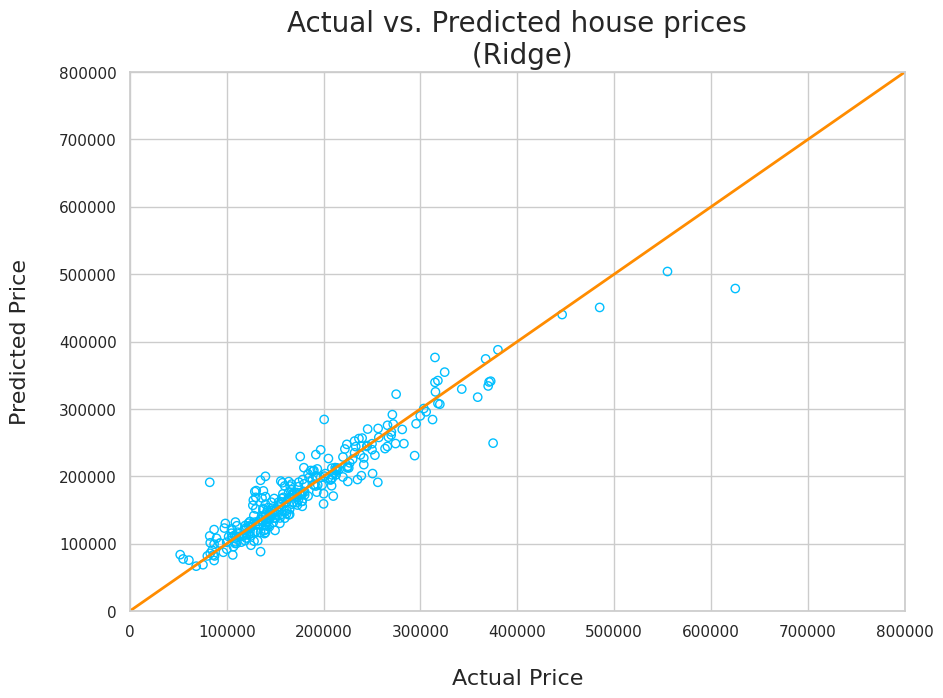

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### IV.2.2. Lasso regression

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()
tuned_parameters = {"alpha": alphas}

In [ ]:
# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# Fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# Print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 1e-05}
Best R² (train): 0.9049941877582839


In [ ]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.8821455180166167
RMSE: 0.1335803040036989


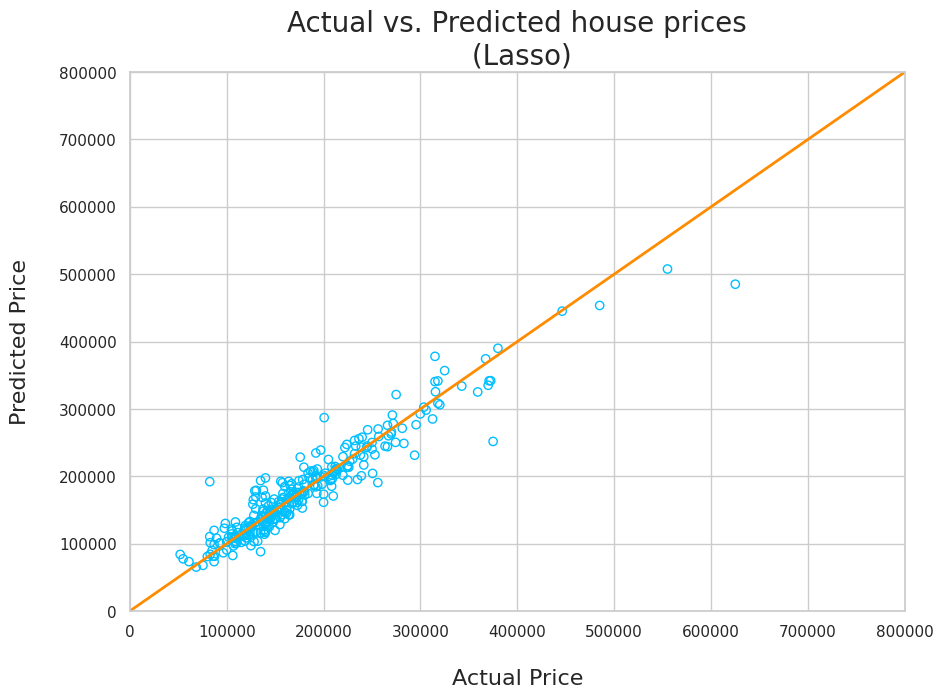

In [ ]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()


### IV.2.3. XGBoost regression

In [ ]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.9009938345978007


In [ ]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(
    seed=20,
    colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
    learning_rate=xgbr_cv.best_params_["learning_rate"],
    max_depth=xgbr_cv.best_params_["max_depth"],
    n_estimators=xgbr_cv.best_params_["n_estimators"]
)

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- XGBRegressor
R²: 0.8829827227671873
RMSE: 0.13310500013258628


In [ ]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

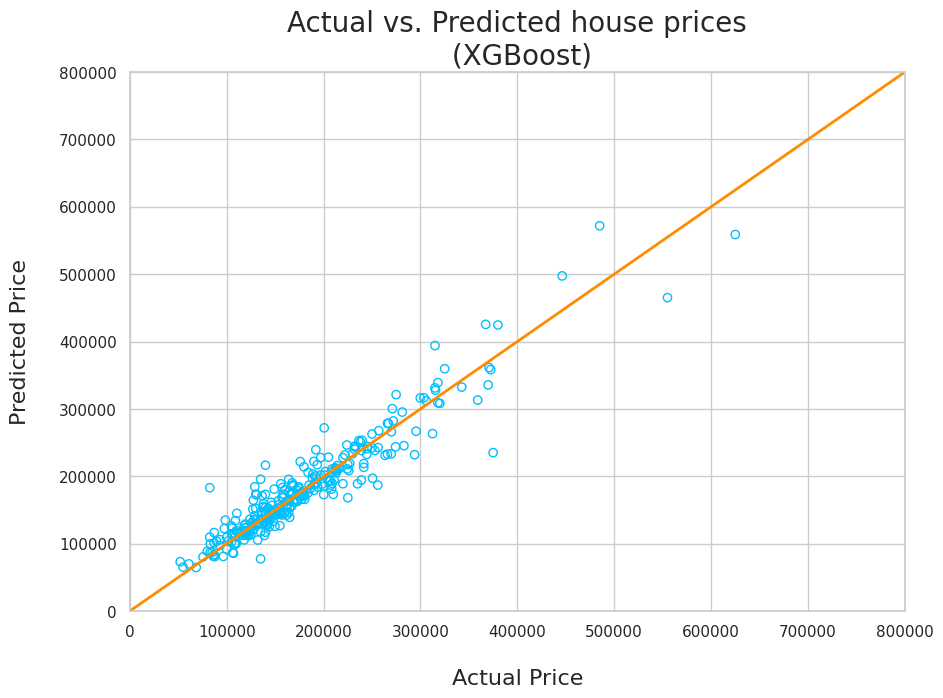

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### IV.2.4. LightGBM regression

In [ ]:
# GridSearch parameters
tuned_parameters = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# Fit GridSearch pada set data latih
lgbm_cv.fit(X_train, y_train)

# Cetak parameter terbaik dan R² yang sesuai
print(f"Best hyperparameters: {lgbm_cv.best_params_}")
print(f"Best R² (train): {lgbm_cv.best_score_}")

# LightGBM Regressor dengan hyperparameters terbaik
lgbm_mod = LGBMRegressor(**lgbm_cv.best_params_)

# Fit model pada set data latih
lgbm_mod.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 38
[LightGBM] [Info] Start training from score 12.023564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMRegressor(max_depth=5, num_leaves=20)

In [ ]:
# Prediksi pada set data uji
y_pred_lgbm = lgbm_mod.predict(X_test)

# Cetak skor
print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred_lgbm)}")
print(f"RMSE: {rmse_score(y_test, y_pred_lgbm)}")


- LGBMRegressor
R²: 0.8751660918478725
RMSE: 0.13747877679887596


In [ ]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

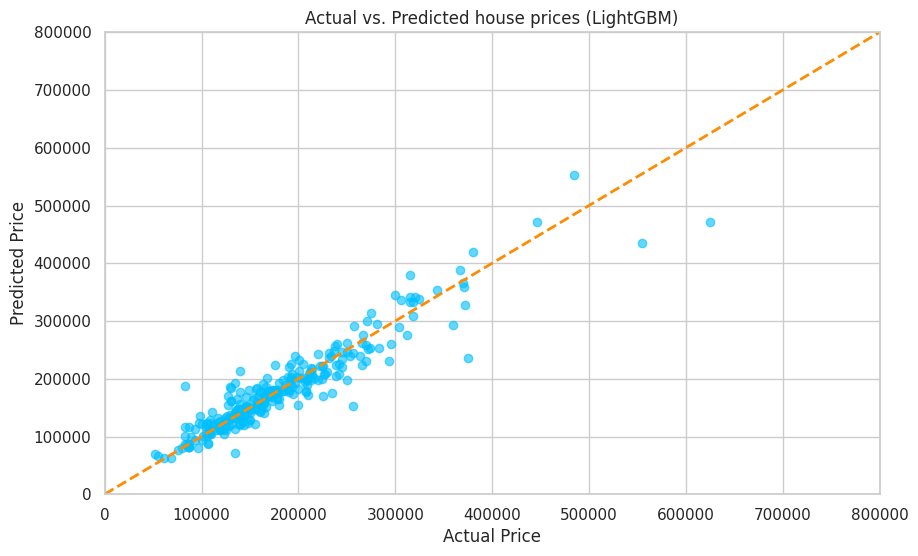

In [ ]:
# Plot Actual vs. Predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), np.exp(y_pred_lgbm), color='deepskyblue', alpha=0.6)
plt.plot([0, 800000], [0, 800000], color='darkorange', lw=2, linestyle='--')
plt.title('Actual vs. Predicted house prices (LightGBM)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.grid(True)
plt.show()

## IV.3. Choosing the best model

 XGBRegressor.

#V. Conclusion (?)
Create as much as you want but relevat to the project!

## Insight 1

berdasarkan dataset House price prediction value overall material and finish of the house mempunyai korelasi yang tinggi dengan saleprice yaitu 0,79 sedangkan Open porch area in square feet mempunyai korelasi paling rendah dengan saleprice yaitu 0,32. ini mengartikan bahwa harga jual yang tinggi salah satunya di pengaruhi oleh material yang bagus dan finishing rumah yang oke.


## Insight 2

Strategi kita dalam menangani missing value yang ada pada dataset ini yaitu dengan menggunakan imputasi(mengisi nilai NaN) dengan median.
setelah melakukan imputasi jika ada fitur yang mempunyai presentase NaN(missing value) lebih dari 5% sebaiknya di hapus karena imputasi tersebut bisa merubah distribusi secara signifikan.


## Insight 3

kesimpulan dari kinerja model regresi yang diuji berdasarkan dataset ini:
RandomForestRegressor, XGBRegressor, dan LGBMRegressor memiliki kinerja yang lebih baik daripada model regresi lainnya.
ini bisa dijadikan sebagai bahan pertimbangan untuk mendapatkan hasil prediksi yang lebih akurat.

## Insight N